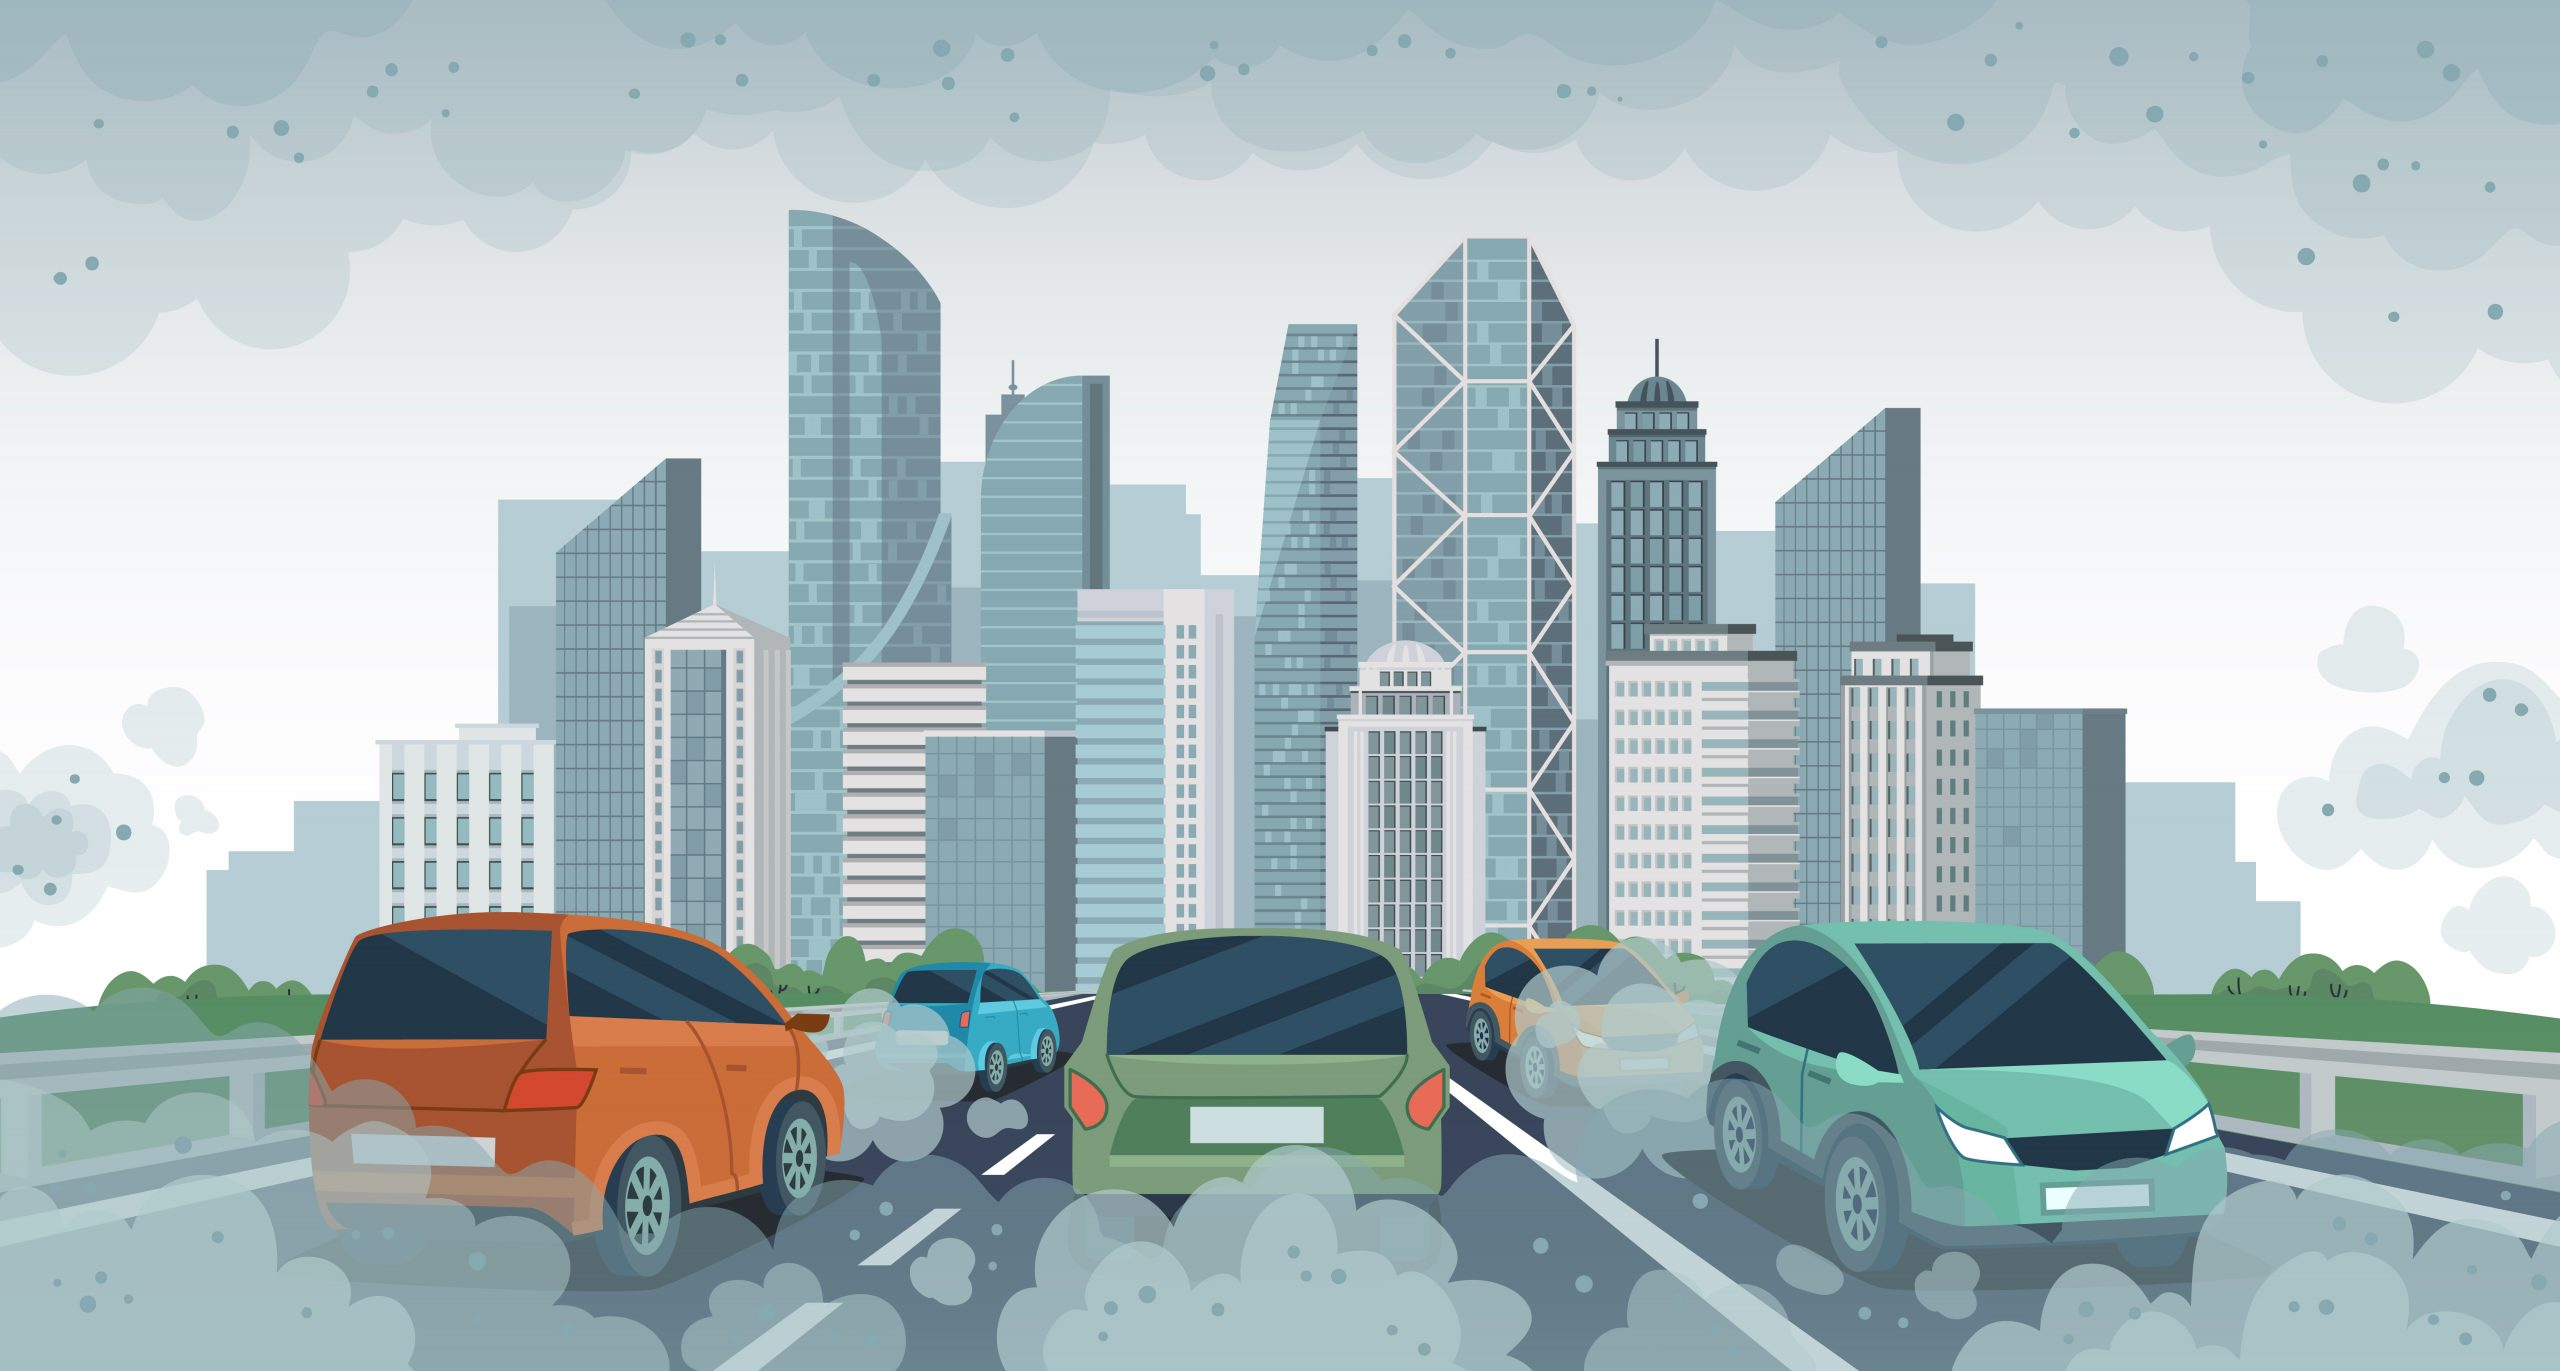
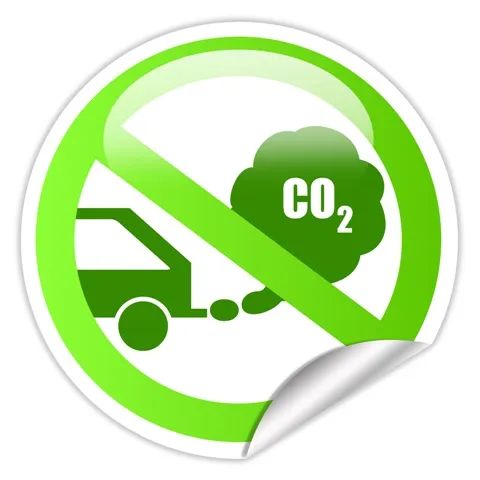

# <font color='green'> <b>About Data Set</b><font color='black'>

This dataset contains information about various car models and their CO2 Emission levels. The following code demonstrates usage of a Linear Regression models to predict CO2 Emission values. The data is divided into train and test sets to measure the metrics of performance of the model. Toward the end of the code, there are also some other Regression techniques.

Fuel Consumption City (L/100 km): This refers to the amount of fuel, measured in liters, that a vehicle consumes per 100 kilometers of driving under city or urban conditions.

Fuel Consumption Hwy (L/100 km): This represents the amount of fuel, measured in liters, that a vehicle consumes per 100 kilometers of driving on highways or open roads.

Fuel Consumption Comb (L/100 km): This metric represents the combined fuel consumption of a vehicle, measured in liters, per 100 kilometers of driving. Unlike the individual "City" and "Hwy" measurements, the "Comb" value takes into account a mix of both city and highway driving conditions. It provides an average fuel efficiency figure that considers the vehicle's performance across various scenarios.

Fuel Consumption Comb (mpg): This metric is an alternative representation of the combined fuel consumption, measured in miles per gallon. Unlike the L/100 km unit, which measures fuel consumption (lower values are better), mpg (miles per gallon) measures fuel efficiency (higher values are better). A higher mpg value indicates that the vehicle can travel more miles using a fixed amount of fuel.

## <font color='blue'> <b>Insights obtained from this model</b><font color='black'>

In this model developed for prediction of CO2 emission based on vehicle characteristics, the main feature is engine size (measured in liters) which is a significant factor in determining a vehicle's power, performance, fuel efficiency, and emissions.

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

## <font color='blue'> <b>Import Library</b><font color='black'>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [70]:

# Load the data
df = pd.read_csv('co2.csv')

In [71]:
# Dataset Overview
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [72]:
df.shape  # number of observations and features

(7385, 12)

In [73]:
df.dtypes # data types

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [74]:
df[df.duplicated()] # check duplicated rows

Make       Model            Vehicle Class  Engine Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
1075          6          AS6         Z                              12.1   
1076          6          AS6         Z                              11.9   
1081          4          AM6         Z                               9.7   
1082         12           A6         Z                              18.0   
1084          8          AM7         Z                              17.4   
...         ...          ...       ...                               ...   
7356          8          AS6         X                              17.7   
7365          4           M6         X                               9.8   
7366          4          AS8         X                               7.8   
7367          4           M6         X                               7.9   
7368          4          AM7         X                               9.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1075                              8.7                              10.6   
1076                              7.7                              10.0   
1081                              6.9                               8.4   
1082                             12.6                              15.6   
1084                             11.3                              14.7   
...                               ...                               ...   
7356                             13.6                              15.9   
7365                              7.3                               8.7   
7366                              5.9                               7.0   
7367                              5.9                               7.0   
7368                              7.2                               8.4   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1075                           27                  244  
1076                           28                  230  
1081                           34                  193  
1082                           18                  359  
1084                           19                  338  
...                           ...                  ...  
7356                           18                  371  
7365                           32                  203  
7366                           40                  162  
7367                           40                  163  
7368                           34                  196  

[1103 rows x 12 columns]

In [ ]:
df.isna().sum() # missing values per feature

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

The dataset seems to be free of any null values.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(

We see that there are no discrpancies in data types of each column; the string ones are assigned as object and the numeric ones are assigned as float or int.

The 'Make', 'Model', 'Vehicle Class', 'Transmission' and 'Fuel Type' columns contain object values, and the 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)' and 'CO2 Emissions(g/km)' columns contain numeric values.

In [79]:
df.describe(include='all').T

count unique          top  freq  \
Make                                6282     42         FORD   577   
Model                               6282   2053    F-150 FFV    32   
Vehicle Class                       6282     16  SUV - SMALL  1006   
Engine Size(L)                    6282.0    NaN          NaN   NaN   
Cylinders                         6282.0    NaN          NaN   NaN   
Transmission                        6282     27          AS6  1139   
Fuel Type                           6282      5            X  3039   
Fuel Consumption City (L/100 km)  6282.0    NaN          NaN   NaN   
Fuel Consumption Hwy (L/100 km)   6282.0    NaN          NaN   NaN   
Fuel Consumption Comb (L/100 km)  6282.0    NaN          NaN   NaN   
Fuel Consumption Comb (mpg)       6282.0    NaN          NaN   NaN   
CO2 Emissions(g/km)               6282.0    NaN          NaN   NaN   

                                        mean        std   min    25%    50%  \
Make                                     NaN        NaN   NaN    NaN    NaN   
Model                                    NaN        NaN   NaN    NaN    NaN   
Vehicle Class                            NaN        NaN   NaN    NaN    NaN   
Engine Size(L)                      3.161812   1.365201   0.9    2.0    3.0   
Cylinders                           5.618911    1.84625   3.0    4.0    6.0   
Transmission                             NaN        NaN   NaN    NaN    NaN   
Fuel Type                                NaN        NaN   NaN    NaN    NaN   
Fuel Consumption City (L/100 km)    12.61022   3.553066   4.2   10.1   12.1   
Fuel Consumption Hwy (L/100 km)     9.070583   2.278884   4.0    7.5    8.7   
Fuel Consumption Comb (L/100 km)   11.017876   2.946876   4.1    8.9   10.6   
Fuel Consumption Comb (mpg)        27.411016   7.245318  11.0   22.0   27.0   
CO2 Emissions(g/km)               251.157752  59.290426  96.0  208.0  246.0   

                                    75%    max  
Make                                NaN    NaN  
Model                               NaN    NaN  
Vehicle Class                       NaN    NaN  
Engine Size(L)                      3.7    8.4  
Cylinders                           6.0   16.0  
Transmission                        NaN    NaN  
Fuel Type                           NaN    NaN  
Fuel Consumption City (L/100 km)   14.7   30.6  
Fuel Consumption Hwy (L/100 km)    10.3   20.6  
Fuel Consumption Comb (L/100 km)   12.7   26.1  
Fuel Consumption Comb (mpg)        32.0   69.0  
CO2 Emissions(g/km)               289.0  522.0

In [80]:
corr = df.corr(numeric_only=True)
corr

Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.928843   
Cylinders                               0.928843   1.000000   
Fuel Consumption City (L/100 km)        0.834228   0.801277   
Fuel Consumption Hwy (L/100 km)         0.766817   0.717647   
Fuel Consumption Comb (L/100 km)        0.820146   0.781099   
Fuel Consumption Comb (mpg)            -0.762955  -0.723731   
CO2 Emissions(g/km)                     0.854802   0.834687   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.834228   
Cylinders                                                 0.801277   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.950811   
Fuel Consumption Comb (L/100 km)                          0.994052   
Fuel Consumption Comb (mpg)                              -0.927640   
CO2 Emissions(g/km)                                       0.918756   

                                  Fuel Consumption Hwy (L/100 km)  \
Engine Size(L)                                           0.766817   
Cylinders                                                0.717647   
Fuel Consumption City (L/100 km)                         0.950811   
Fuel Consumption Hwy (L/100 km)                          1.000000   
Fuel Consumption Comb (L/100 km)                         0.978607   
Fuel Consumption Comb (mpg)                             -0.891892   
CO2 Emissions(g/km)                                      0.883424   

                                  Fuel Consumption Comb (L/100 km)  \
Engine Size(L)                                            0.820146   
Cylinders                                                 0.781099   
Fuel Consumption City (L/100 km)                          0.994052   
Fuel Consumption Hwy (L/100 km)                           0.978607   
Fuel Consumption Comb (L/100 km)                          1.000000   
Fuel Consumption Comb (mpg)                              -0.925801   
CO2 Emissions(g/km)                                       0.916840   

                                  Fuel Consumption Comb (mpg)  \
Engine Size(L)                                      -0.762955   
Cylinders                                           -0.723731   
Fuel Consumption City (L/100 km)                    -0.927640   
Fuel Consumption Hwy (L/100 km)                     -0.891892   
Fuel Consumption Comb (L/100 km)                    -0.925801   
Fuel Consumption Comb (mpg)                          1.000000   
CO2 Emissions(g/km)                                 -0.906783   

                                  CO2 Emissions(g/km)  
Engine Size(L)                               0.854802  
Cylinders                                    0.834687  
Fuel Consumption City (L/100 km)             0.918756  
Fuel Consumption Hwy (L/100 km)              0.883424  
Fuel Consumption Comb (L/100 km)             0.916840  
Fuel Consumption Comb (mpg)                 -0.906783  
CO2 Emissions(g/km)                          1.000000

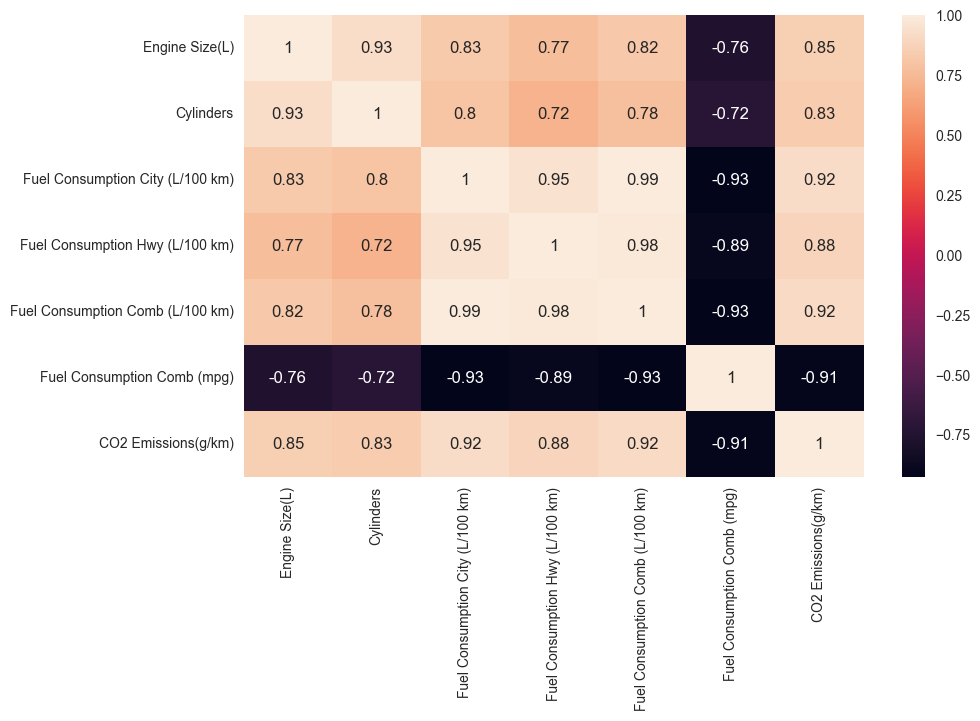

In [81]:
sns.heatmap(corr, annot = True), ;
plt.show(sns)

In [82]:
#pip install ydata_profiling

In [83]:

from ydata_profiling import ProfileReport
# Generate the report
profile = ProfileReport(df,title="co2")

In [84]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>Simple Linear Regression (SLR)</b></p>

In [85]:
slr = df[['Engine Size(L)','CO2 Emissions(g/km)' ]] # df is defined for SLR
slr.shape

(6282, 2)

In [86]:
X = slr['Engine Size(L)']
y = slr['CO2 Emissions(g/km)'] # Dependent(Target) and independent variables are defined

In [87]:
np.polyfit(X, y, deg=1)

array([ 37.12386481, 133.77908869])

In [88]:
slope, intercept = np.polyfit(X, y, deg=1)
print(slope, intercept)

37.12386481161426 133.7790886945734


In [89]:
y_pred = 37.123* X + 133.779  # coefficient obtained from the SLR model used for calculation of target variable
y_pred

0       208.0250
1       222.8742
2       189.4635
3       263.7095
4       263.7095
          ...   
7380    208.0250
7381    208.0250
7382    208.0250
7383    208.0250
7384    208.0250
Name: Engine Size(L), Length: 6282, dtype: float64

In [90]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
slr_metrics = pd.DataFrame(values)
slr_metrics

actual  predicted  residual          LSE
0        196   208.0250  -12.0250   144.600625
1        221   222.8742   -1.8742     3.512626
2        136   189.4635  -53.4635  2858.345832
3        255   263.7095   -8.7095    75.855390
4        244   263.7095  -19.7095   388.464390
...      ...        ...       ...          ...
7380     219   208.0250   10.9750   120.450625
7381     232   208.0250   23.9750   574.800625
7382     240   208.0250   31.9750  1022.400625
7383     232   208.0250   23.9750   574.800625
7384     248   208.0250   39.9750  1598.000625

[6282 rows x 4 columns]

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>Multiple Linear Regression (MLR)</b></p>

In [91]:
# df determined for MLR
mlr = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]

In [92]:
mlr.head()

Engine Size(L)  Fuel Consumption City (L/100 km)  \
0             2.0                               9.9   
1             2.4                              11.2   
2             1.5                               6.0   
3             3.5                              12.7   
4             3.5                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244

In [93]:
# Dependent(target) and independent variables assigned
X = mlr.drop(columns='CO2 Emissions(g/km)')
y = mlr['CO2 Emissions(g/km)']

In [94]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [95]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5025, 4)
y Train features shape: (5025,)
X Test features shape : (1257, 4)
Y Test features shape : (1257,)


In [96]:
# To obtain primitive scores, LR is made
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [97]:
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(X_test)
y_pred

array([329.66498307, 175.75309404, 204.82480793, ..., 361.22560606,
       263.39429723, 326.70127791])

In [99]:
my_dict = {"actual": y_test, "prediction": y_pred, "residual":(y_test - y_pred)}

comparing = pd.DataFrame(my_dict)
comparing

actual  prediction   residual
2936     360  329.664983  30.335017
2417     167  175.753094  -8.753094
2750     219  204.824808  14.175192
4472     283  283.143664  -0.143664
4754     324  308.526599  15.473401
...      ...         ...        ...
2171     122  150.149633 -28.149633
274      237  248.831508 -11.831508
3754     284  361.225606 -77.225606
3659     272  263.394297   8.605703
761      350  326.701278  23.298722

[1257 rows x 3 columns]

In [100]:
result_sample = comparing.head(25)

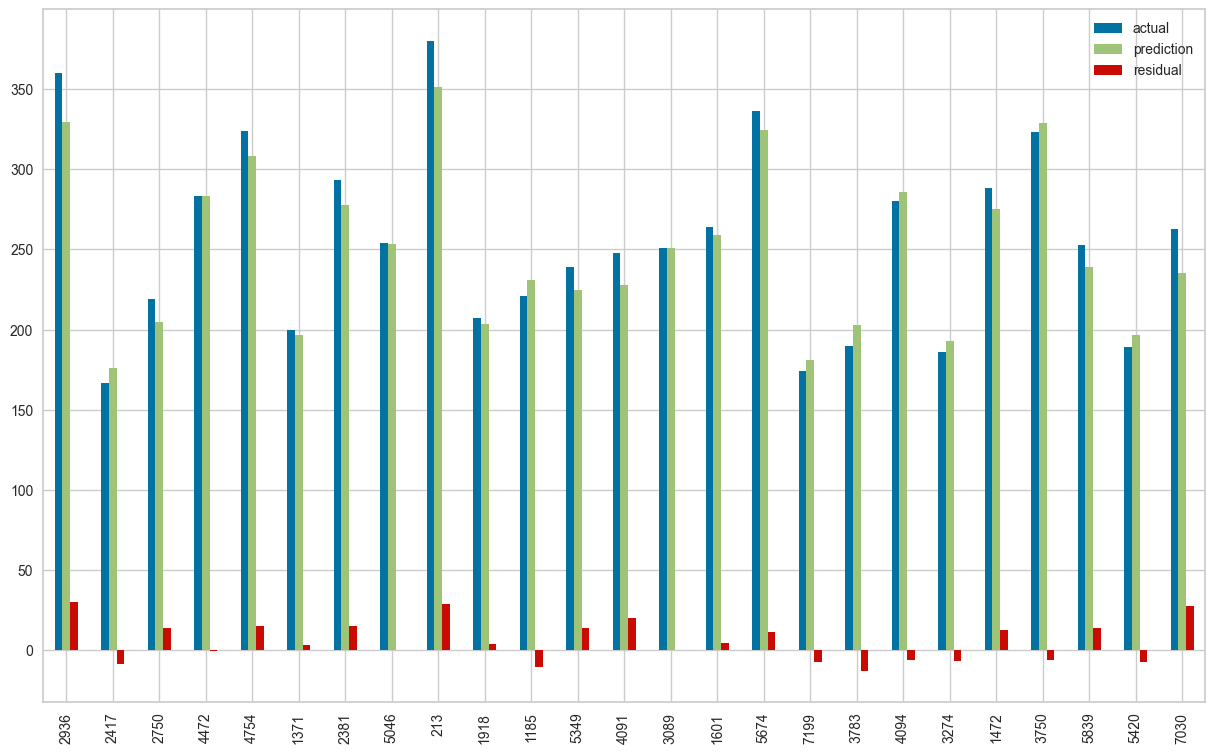

In [101]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [102]:
# Evaluation of LR model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
#R2 Score measurement
R2_score = r2_score(y_test, y_pred)
R2_score

0.8644491318347386

In [104]:
# MAE measurement
mae = mean_absolute_error(y_test, y_pred)  # ne kadar dusuk o kadar basarili
mae

13.452412111900736

In [105]:
# MSE measurement
mse = mean_squared_error(y_test, y_pred)  # ne kadar dusuk o kadar basarili
mse

437.5797607055079

In [106]:
# root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # ne kadar dusuk okadar iyi, hatalari daha fazla cezalandirir, outlierlara karsi cok hassas.
rmse

20.91840722200206

In [107]:
# MAE error metric - The closest to "0' the better the model is.
mae / mlr['CO2 Emissions(g/km)'].mean()

0.0535616041641988

In [108]:
# RMSE error metric
rmse / mlr['CO2 Emissions(g/km)'].mean()   # outlier a daha hassas oldugu icin mae ye gore kayip var

0.08328792175339352

In [109]:
#Adjusted R2 score measurement
def adj_r2(y_test, y_pred, df_mlr):
    r2 = r2_score(y_test, y_pred)    #R2 score
    n = df_mlr.shape[0]      # number of observations gözlem
    p =df_mlr.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [110]:
adj_r2(y_test, y_pred, mlr)

0.8643627524381063

In [111]:
# Error metrics measurement and display
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [112]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8644491318347386
MAE 		: 13.452412111900736
MSE 		: 437.5797607055079
RMSE 		: 20.91840722200206


In [113]:
# Overfitting kontrolü için train data daki R2 yi bulalım ve yukardak test R2 (0.86) ile karşılaştıralım
# X_train degerlerini prediction yapacağız
y_train_pred = lr.predict(X_train)

In [114]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.875003906671852
MAE 		: 13.776528132283929
MSE 		: 448.2803364583642
RMSE 		: 21.17263177921829


In [115]:
residuals = y_test- y_pred

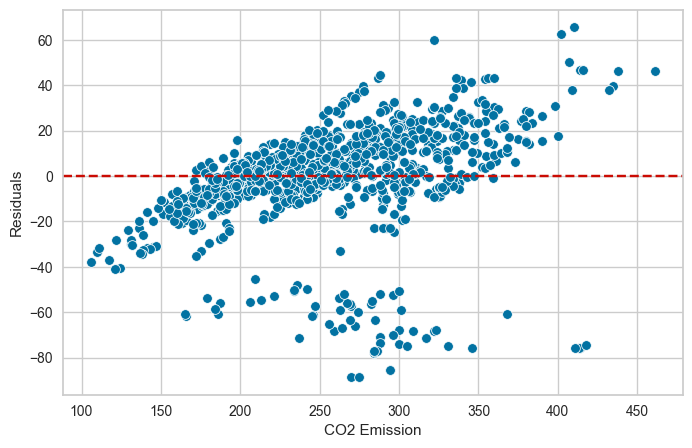

In [116]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=y_test, y=residuals)
plt.xlabel("CO2 Emission")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle = "--")
plt.show()

In [117]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

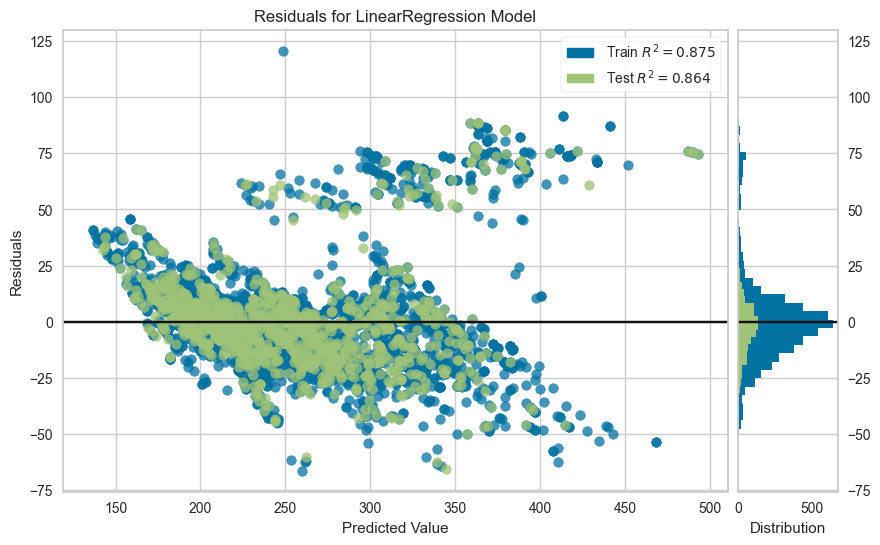

In [118]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() ;                # Finalize and render the figure

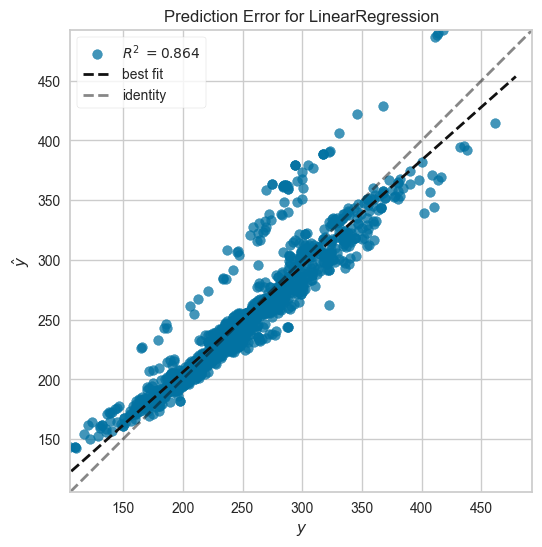

In [119]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>Polynomial Features</b></p>

In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
X = mlr.drop(columns='CO2 Emissions(g/km)', axis=1)
y = mlr['CO2 Emissions(g/km)']

In [122]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [123]:
poly_features = poly_conv.fit_transform(X)
poly_features

array([[   2.   ,    9.9  ,    6.7  , ...,  381.565,  484.075,  614.125],
       [   2.4  ,   11.2  ,    7.7  , ...,  569.184,  709.632,  884.736],
       [   1.5  ,    6.   ,    5.8  , ...,  198.476,  201.898,  205.379],
       ...,
       [   2.   ,   11.7  ,    8.6  , ...,  761.788,  912.374, 1092.727],
       [   2.   ,   11.2  ,    8.3  , ...,  682.011,  813.483,  970.299],
       [   2.   ,   12.2  ,    8.7  , ...,  809.883,  996.063, 1225.043]])

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=19)

In [125]:
from sklearn.linear_model import LinearRegression
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = model_poly.predict(X_test)

In [127]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual        pred   residual
2936     360  326.215215  33.784785
2417     167  164.188578   2.811422
2750     219  216.960832   2.039168
4472     283  282.953443   0.046557
4754     324  314.506634   9.493366
1371     200  200.984543  -0.984543
2381     293  279.078315  13.921685
5046     254  261.265481  -7.265481
213      380  362.714990  17.285010
1918     207  208.718044  -1.718044
1185     221  228.287557  -7.287557
5349     239  230.644054   8.355946
4091     248  240.233699   7.766301
3089     251  257.404138  -6.404138
1601     264  268.219255  -4.219255
5674     336  327.876250   8.123750
7199     174  175.385252  -1.385252
3783     190  198.973152  -8.973152
4094     280  282.182425  -2.182425
3274     186  187.521486  -1.521486

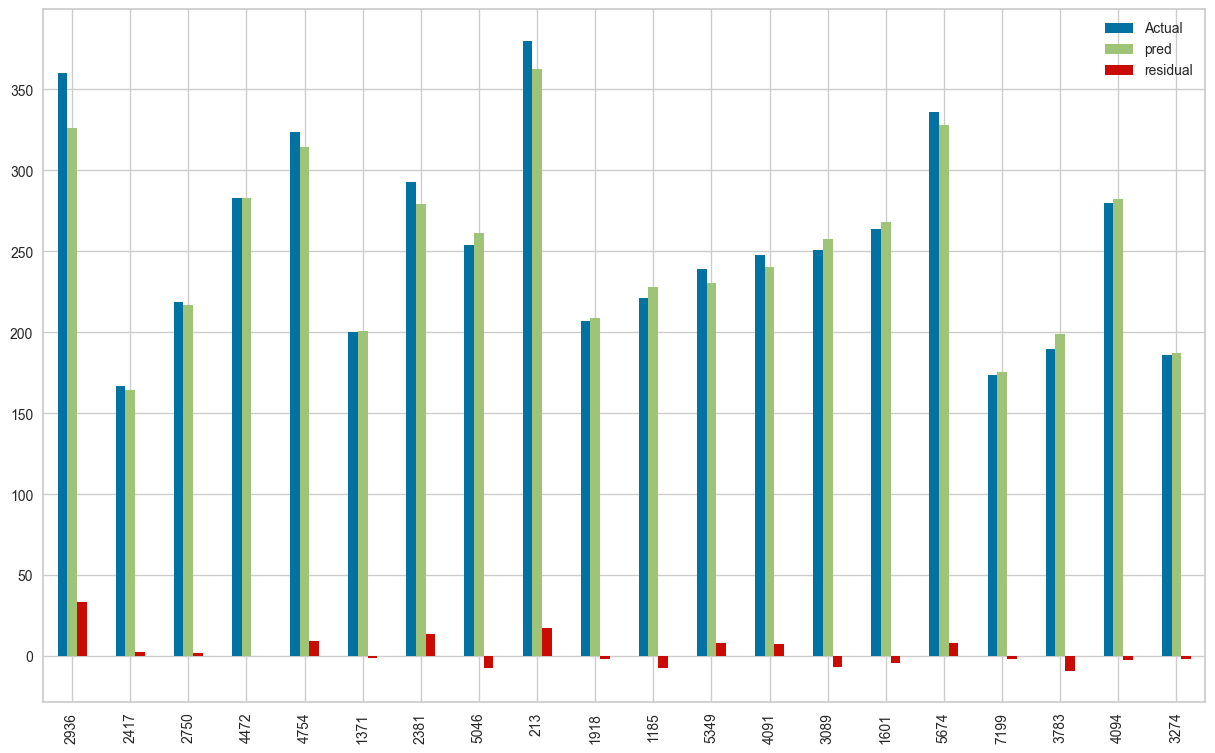

In [128]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

In [129]:
model_poly.coef_

array([   1.72387769,  153.49267213,  131.57313772, -224.46244929,
        -10.27282815,   -9.91445626,   -8.05592095,   22.89461528,
        -14.41091422,  -60.82432554,   57.96040743,  -48.62156902,
        129.21555808,  -66.92574091,   -1.71108893,   -6.88924608,
         -8.68921111,   17.13116374,  -33.21019424,  -69.20291608,
        138.3186978 ,  -38.33172634,  148.6685673 , -146.60990911,
         24.080342  ,   31.02105386,  -94.7255245 ,    2.95646197,
        -46.16688662,   99.99658549,   -6.96033238,   31.61301925,
        -31.35978096,  -10.34627598])

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [131]:
y_pred = model_poly.predict(X_test) #X_test ile testimi yapıyorum

In [132]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [133]:
eval_metric(y_test, y_pred)  # Test kısmının degerleri

Model testing performance:
--------------------------
R2_score 	: 0.9196612643901002
MAE 		: 9.365766864508378
MSE 		: 259.34621577416317
RMSE 		: 16.10422974793154


In [134]:
y_train_pred = model_poly.predict(X_train)

In [135]:
poly = pd.DataFrame(eval_metric(y_train, y_train_pred))
poly

Model testing performance:
--------------------------
R2_score 	: 0.9289769384698825
MAE 		: 9.379867152349298
MSE 		: 254.71389602105685
RMSE 		: 15.959758645451279


Empty DataFrame
Columns: []
Index: []

In [136]:
poly

Empty DataFrame
Columns: []
Index: []

In [137]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [138]:
poly(10)

train_rmse_errors  test_rmse_errors  number of features
1          21.077538         21.231260                   4
2          16.939365         17.073598                  14
3          15.924795         16.194105                  34
4          14.457787         14.649568                  69
5          13.640253         15.599704                 125
6          12.221326         27.892767                 209
7          10.907750         40.924210                 329
8          14.041089        110.183130                 494
9           9.544993         85.325876                 714

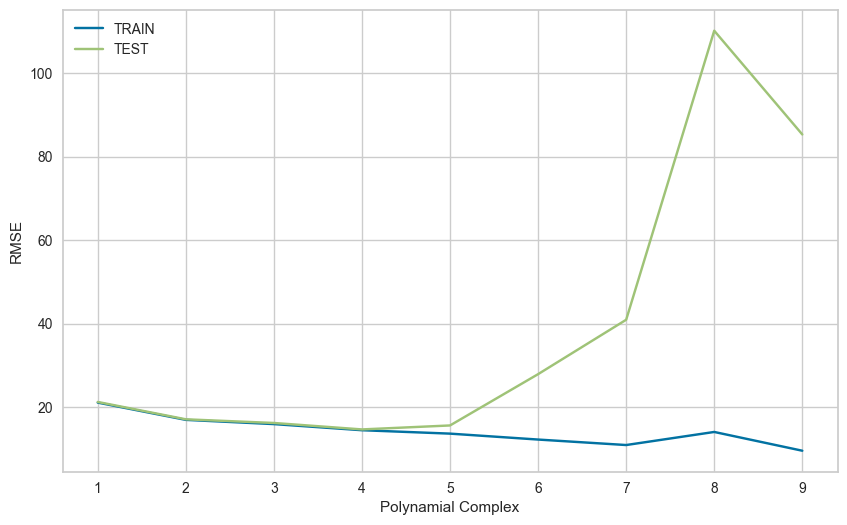

In [139]:
# yukardakş sonucların grafigini çizelim ve patlama noktasını görelim
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

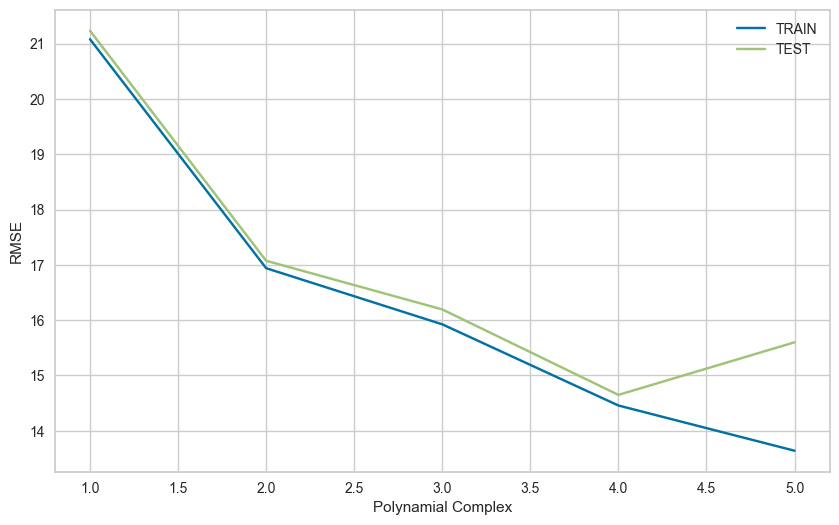

In [140]:
# grafige daha yaakından bakalım
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

**Since the R2 score both train and test 0.93 and the RMSEs closest to 0, I choose 3th degree as best polynomial degree**

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>Scaling the Data</b></p>

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=19)

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [143]:
poly_features.shape

(6282, 34)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [145]:
X_train_scaled.shape

(5025, 34)

In [146]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[ 1.11665136,  1.56331274,  1.10529091, ...,  0.92976391,
         1.06695449,  1.19891225],
       [-1.28343045, -1.23639592, -1.43102148, ..., -0.84828097,
        -0.84358284, -0.83456264],
       [-1.13797094, -0.76044544, -0.29405385, ..., -0.44442879,
        -0.50863633, -0.5632667 ],
       ...,
       [ 1.55302987,  1.98326904,  2.11106996, ...,  2.16854032,
         2.17472777,  2.15855999],
       [ 0.24389434,  0.16345841,  0.27442996, ..., -0.00909585,
        -0.03313483, -0.05893814],
       [ 1.11665136,  1.25534479,  1.6300452 , ...,  1.36781736,
         1.28879801,  1.19891225]])

**Check if there is data leakage**

In [147]:
pd.DataFrame(X_train_scaled).agg(['mean', 'std']).round()

0    1    2    3    4    5    6    7    8    9   ...   24   25   26  \
mean -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  ...  0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       27   28   29   30   31   32   33  
mean -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 34 columns]

In [148]:
pd.DataFrame(X_test_scaled).agg(['mean', 'std']).round()

0    1    2    3    4    5    6    7    8    9   ...   24   25   26  \
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ... -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       27   28   29   30   31   32   33  
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 34 columns]

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
lm = LinearRegression()

In [151]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [152]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [154]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

linear_train  linear_test
R2        0.928977     0.919661
mae       9.379867     9.365767
mse     254.713896   259.346216
rmse     15.959759    16.104230

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>Cross Validation</b></p>

In [155]:
from sklearn.model_selection import cross_validate, cross_val_score

In [156]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error'], cv = 5)

In [157]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.017917    0.000000  0.937260                     -9.287954   
2  0.015143    0.000000  0.932684                     -9.326748   
3  0.020788    0.003999  0.935179                     -8.873039   
4  0.007206    0.000000  0.909458                     -9.906898   
5  0.018571    0.005000  0.919609                    -10.012954   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                  -229.319324                        -15.143293  
2                  -256.943197                        -16.029448  
3                  -221.539057                        -14.884188  
4                  -304.117040                        -17.438952  
5                  -295.727703                        -17.196735

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>RidgeCV</b></p>

In [158]:
from sklearn.linear_model import RidgeCV

In [159]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [160]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [161]:
ridge_cv_model.alpha_

0.01

In [162]:
ridge_cv_model = RidgeCV(alphas = np.linspace(0.0001, 0.06, 100), cv=5, scoring='neg_root_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.0001    , 0.00070505, 0.0013101 , 0.00191515, 0.0025202 ,
       0.00312525, 0.0037303 , 0.00433535, 0.0049404 , 0.00554545,
       0.00615051, 0.00675556, 0.00736061, 0.00796566, 0.00857071,
       0.00917576, 0.00978081, 0.01038586, 0.01099091, 0.01159596,
       0.01220101, 0.01280606, 0.01341111, 0.01401616, 0.01462121,
       0.01522626, 0.01583131, 0.01643636, 0.01704141, 0.01764646,
       0.0182...
       0.04245354, 0.04305859, 0.04366364, 0.04426869, 0.04487374,
       0.04547879, 0.04608384, 0.04668889, 0.04729394, 0.04789899,
       0.04850404, 0.04910909, 0.04971414, 0.05031919, 0.05092424,
       0.05152929, 0.05213434, 0.05273939, 0.05334444, 0.05394949,
       0.05455455, 0.0551596 , 0.05576465, 0.0563697 , 0.05697475,
       0.0575798 , 0.05818485, 0.0587899 , 0.05939495, 0.06      ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [163]:
ridge_cv_model.alpha_

0.0001

In [164]:
ridge_cv_model.best_score_

-16.13256247898915

In [165]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [166]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, 'Ridge_CV')
rcs

Ridge_CV_train  Ridge_CV_test
R2          0.928648       0.919815
mae         9.391581       9.328755
mse       255.892237     258.849230
rmse       15.996632      16.088792

In [167]:
ridge_cv_model.coef_

array([    2.23951673,   358.35147465,   202.08256023,  -379.98748053,
        -112.87541326,  -264.38069012,  -157.72022959,   558.60262473,
        -195.95859919,   -52.80298368, -1118.14878839,  -419.67853149,
          52.07077101,  1470.23391267,  -111.94200736,   196.70819261,
        -276.26002937,   461.44077192,  -221.5298629 ,  1433.49631077,
        -867.45024782,  -268.45355211,   -14.96541945,  -394.39424752,
        1052.25518394,  -800.59532094,  -299.91793199,  2063.96930616,
       -1431.28789396,  -122.69636958,   418.65135214,  -714.82494393,
       -1359.50694101,  1373.75791837])

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>LassoCV</b></p>

In [168]:
from sklearn.linear_model import Lasso, LassoCV

In [169]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=10000, random_state=19)

In [170]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=19)

In [171]:
lasso_cv_model.alpha_

0.01

In [172]:
best_alpha = lasso_cv_model.alpha_

In [173]:

lasso_cv_model = LassoCV(alphas=np.linspace(0.0001, 0.02, 100), cv=5, max_iter=10000, random_state=19)

In [174]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.0001    , 0.00030101, 0.00050202, 0.00070303, 0.00090404,
       0.00110505, 0.00130606, 0.00150707, 0.00170808, 0.00190909,
       0.0021101 , 0.00231111, 0.00251212, 0.00271313, 0.00291414,
       0.00311515, 0.00331616, 0.00351717, 0.00371818, 0.00391919,
       0.0041202 , 0.00432121, 0.00452222, 0.00472323, 0.00492424,
       0.00512525, 0.00532626, 0.00552727, 0.00572828, 0.00592929,
       0.00...
       0.01417071, 0.01437172, 0.01457273, 0.01477374, 0.01497475,
       0.01517576, 0.01537677, 0.01557778, 0.01577879, 0.0159798 ,
       0.01618081, 0.01638182, 0.01658283, 0.01678384, 0.01698485,
       0.01718586, 0.01738687, 0.01758788, 0.01778889, 0.0179899 ,
       0.01819091, 0.01839192, 0.01859293, 0.01879394, 0.01899495,
       0.01919596, 0.01939697, 0.01959798, 0.01979899, 0.02      ]),
        cv=5, max_iter=10000, random_state=19)

In [175]:
lasso_cv_model.alpha_

0.0001

In [176]:
best_alpha = lasso_cv_model.alpha_

In [177]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [178]:
lcs = train_val(y_train, y_train_pred, y_test,y_pred, 'lasso_cv')
lcs

lasso_cv_train  lasso_cv_test
R2          0.926195       0.915436
mae         9.285191       9.202250
mse       264.691184     272.985804
rmse       16.269333      16.522282

In [179]:
lasso_cv_model.coef_

array([  10.86366581,  123.31824214,   10.63130643,   38.25697352,
        -36.58430419,   -9.16686519,  -13.05412702,   17.14878757,
       -197.14921763,  -36.31645451,   31.92981294,   52.41211909,
        -42.33573912,    5.98343315,  -60.11592093,  122.07896981,
         55.23927023,  -32.87335463,   -0.59046871,  -35.24269956,
         21.43990849,   39.5676371 ,  -39.15826389,   -0.53007893,
        109.20307071, -121.99696477,   75.4974413 ,  -43.6257592 ,
        -23.0832059 ,   40.19624553,  145.87411635, -104.95137111,
        -52.36685173,    7.51118416])

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>ElasticNet</b></p>

In [180]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [181]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [182]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [183]:
elastic_cv_model.alpha_

0.01

In [184]:
elastic_cv_model.l1_ratio_

1.0

In [185]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [186]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2            0.924916         0.914005
mae           9.098294         9.017538
mse         269.276144       277.605733
rmse         16.409636        16.661505

In [187]:
elastic_cv_model.coef_

array([   4.05420345,   89.33265849,   48.40990241,   36.44394763,
        -41.63253125,    0.        ,   16.33681702,    0.        ,
        -59.44006338, -128.41701081,   -5.6329024 ,    0.        ,
         -0.        ,   -0.        ,  -20.76409251,   31.01984875,
         18.11185038,    0.        ,   59.75656324,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         59.36070087,  -63.05600586,    0.        ,   -0.        ,
        -38.34403145,   -0.        ,   50.13799992,   -0.        ,
         -0.        ,   -0.        ])

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>GridSearch</b></p>

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [190]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [191]:
grid_model = GridSearchCV(estimator= elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2) # verbose alttaki raporu verdi

In [192]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   2.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   2.9s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [193]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [194]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [195]:
gcs = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gcs

GridSearch_train  GridSearch_test
R2            0.925032         0.914295
mae           9.148388         9.077406
mse         268.862718       276.670328
rmse         16.397034        16.633410

In [196]:
pd.concat([ls, rcs,lcs,ecs,gcs], axis = 1)

linear_train  linear_test  Ridge_CV_train  Ridge_CV_test  \
R2        0.928977     0.919661        0.928648       0.919815   
mae       9.379867     9.365767        9.391581       9.328755   
mse     254.713896   259.346216      255.892237     258.849230   
rmse     15.959759    16.104230       15.996632      16.088792   

      lasso_cv_train  lasso_cv_test  elastic_cv_train  elastic_cv_test  \
R2          0.926195       0.915436          0.924916         0.914005   
mae         9.285191       9.202250          9.098294         9.017538   
mse       264.691184     272.985804        269.276144       277.605733   
rmse       16.269333      16.522282         16.409636        16.661505   

      GridSearch_train  GridSearch_test  
R2            0.925032         0.914295  
mae           9.148388         9.077406  
mse         268.862718       276.670328  
rmse         16.397034        16.633410

# <p style="background-color:blue;font-family:newtimeroman;font-size:60%;color:white;text-align:center;border-radius:15px 15px;"><b>Final Model</b></p>

In [197]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [198]:
final_model = ElasticNet(alpha=0.01, l1_ratio=1.0) #ikiside aynı

In [199]:
final_model.fit(X_scaled, y)

ElasticNet(alpha=0.01, l1_ratio=1.0)